#                           Linear Regression - Weather Forecast

The dataset is from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather)
It is the hourly weather data of Szeged, Hungary between 2006- 2016.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
weather = pd.read_csv("/Users/nagihan/Downloads/weatherHistory.csv")
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


There are some null values in Precip Type.

In [4]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
weather["Loud Cover"].unique()

array([0.])

As we can see the table above and the result of unique value method for Loud Cover is zero. So we can drop this column because it has no menaning.

In [7]:
weather.drop(columns=["Loud Cover"], inplace = True)
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


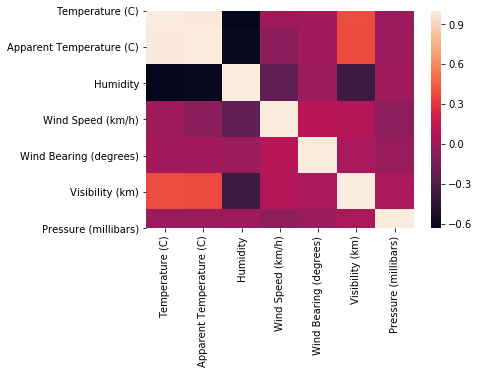

In [8]:
sns.heatmap(weather.corr())

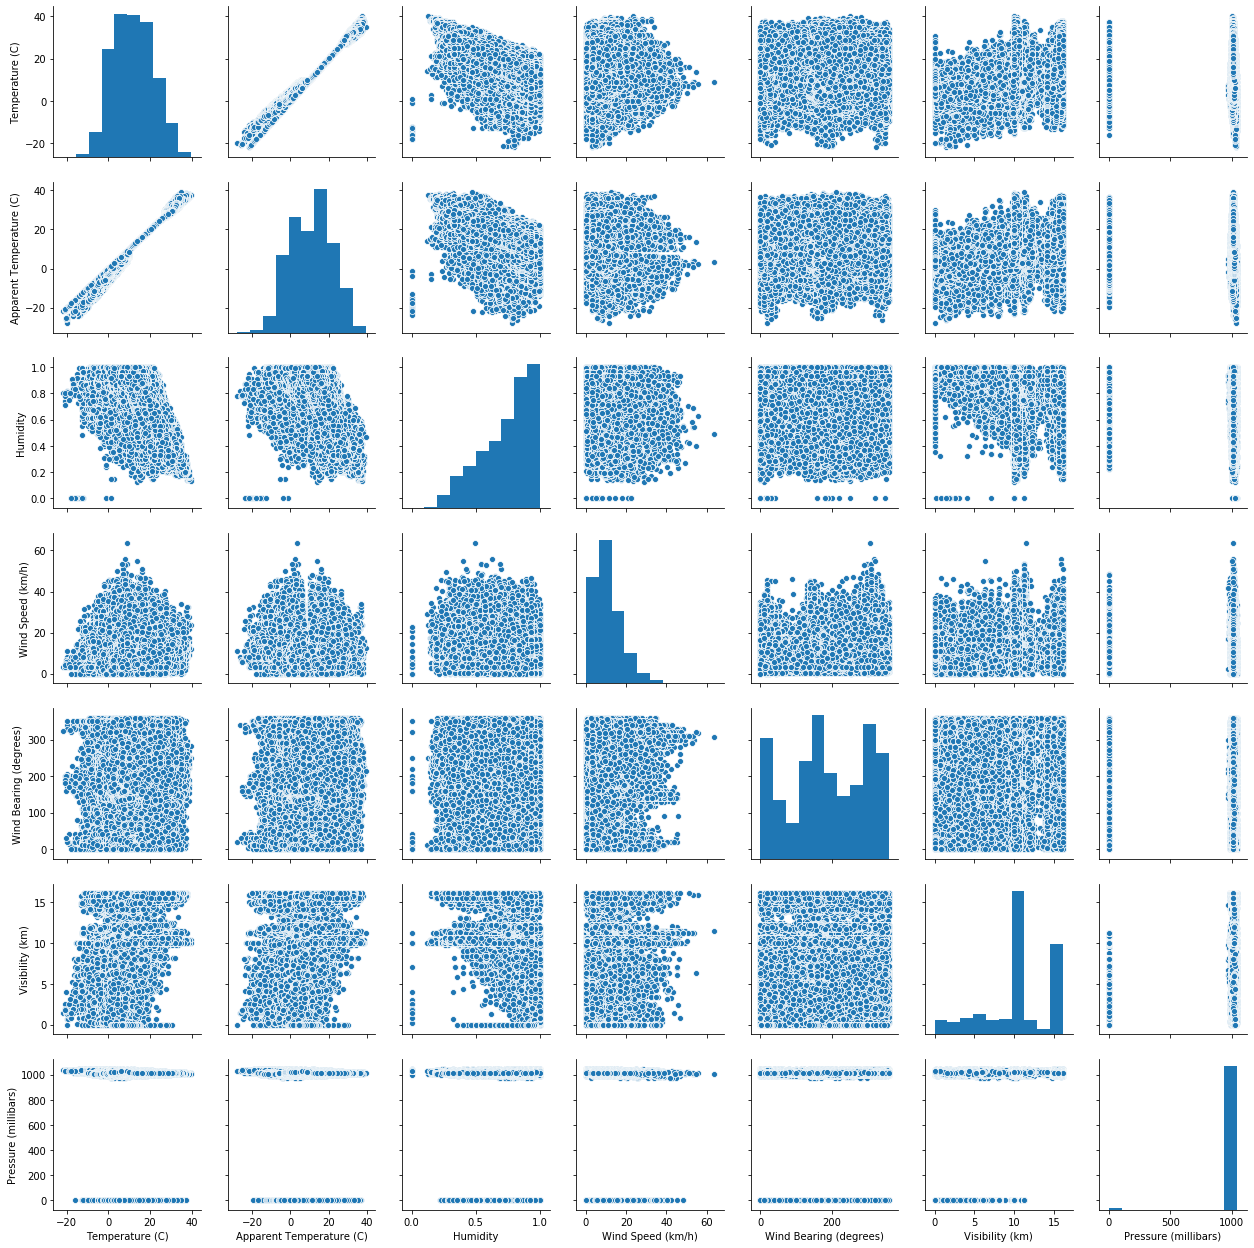

In [13]:
sns.pairplot(weather)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [27]:
X = weather[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = weather['Apparent Temperature (C)']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# create model
lm = LinearRegression()

In [31]:
#now train model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
prediction = lm.predict(X_test)

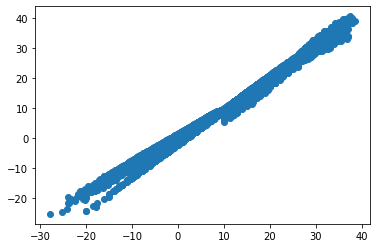

In [33]:
plt.scatter(y_test, prediction)

### Residual Histogram

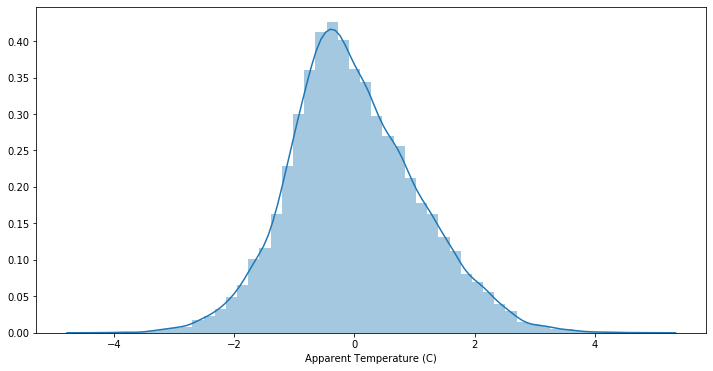

In [43]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-prediction),bins=50);

In [35]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Temperature (C),1.124797
Humidity,1.005458
Wind Speed (km/h),-0.095533
Wind Bearing (degrees),0.000485
Visibility (km),-0.001143
Pressure (millibars),0.000210


This table shows us:
* If Temperature increases 1 unit, Apparent Temprature increases 1.124797 Celcius.
* If Humidity increases 1 unit, Apparent Temprature increases 1.005458 Celcius.
* If Wind Speed increases 1 unit, Apparent Temprature decreases 0.095533 Celcius.
* If Wind Bearing increases 1 unit, Apparent Temprature increases 0.000485 Celcius.
* If Visibility increases 1 unit, Apparent Temprature decreases 0.001143 Celcius.
* If Pressure increases 1 unit, Apparent Temprature increases 0.000210 Celcius.

In [36]:
from sklearn import metrics

In [38]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, prediction))
print("Mean Square Error (MSE): ", metrics.mean_squared_error(y_test, prediction))
print("Root Mean Square Error (RMSE): ", np.sqrt(metrics.mean_absolute_error(y_test, prediction)))

Mean Absolute Error (MAE):  0.8481089710736089
Mean Square Error (MSE):  1.1562905214173032
Root Mean Square Error (RMSE):  0.920928320269069
